In [ ]:
!pip install biopython requests beautifulsoup4 pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 44.8 MB/s eta 0:00:00


In [ ]:
!pip install biopython arxiv networkx matplotlib pyvis

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.0 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=3a566a71629303eb69e45582449594607700fa3ddbdad0e0871e5f5ceaaa4ffc
  Stored in directory: /root/.cache/pip/wheels/3b/25/2a/105d6a15df6914f4d15047691c6c28f9052cc1173e40285d03
Successfully built sgmllib3k


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import arxiv
from pyvis.network import Network
from IPython.display import IFrame

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def fetch_pubmed_articles(query, max_results=10):
    base_url = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi"
    params = {
        "db": "pubmed",
        "term": query,
        "retmax": max_results,
        "retmode": "xml"
    }
    response = requests.get(base_url, params=params)
    soup = BeautifulSoup(response.text, "xml")
    ids = [id_tag.text for id_tag in soup.find_all("Id")]

    articles = []
    for pubmed_id in ids:
        fetch_url = f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=pubmed&id={pubmed_id}&retmode=xml"
        details = requests.get(fetch_url)
        detail_soup = BeautifulSoup(details.text, "xml")

        title = detail_soup.find("ArticleTitle").text if detail_soup.find("ArticleTitle") else "N/A"
        abstract = detail_soup.find("AbstractText").text if detail_soup.find("AbstractText") else "N/A"
        pub_date = detail_soup.find("PubDate").text if detail_soup.find("PubDate") else "N/A"

        articles.append({"ID": pubmed_id, "Title": title, "Abstract": abstract, "Date": pub_date})

    return pd.DataFrame(articles)

# Run the function in Google Colab
df = fetch_pubmed_articles("drug repurposing ATC", max_results=10)
df.head()


,ID,Title,Abstract,Date
0,40119265,Prediction of drug's anatomical therapeutic ch...,The Anatomical Therapeutic Chemical (ATC) clas...,2025Mar21
1,39459033,Auranofin as a Novel Anticancer Drug for Anapl...,Background/Objectives: Anaplastic thyroid canc...,2024Oct18
2,38698208,Computational drug repositioning with attentio...,Drug repositioning aims to identify new therap...,2024May02
3,38496343,OntoloViz: a GUI for interactive visualization...,Structured vocabularies for drugs and diseases...,2023
4,38242684,DAPredict: a database for drug action phenotyp...,"The phenotypes of drug action, including thera...",2024Jan18


In [ ]:
# Search for specific drugs in thyroid cancer context
df = fetch_pubmed_articles("(anaplastic thyroid cancer) AND (sorafenib OR lenvatinib OR cabozantinib OR vandetanib OR everolimus OR pazopanib OR nivolumab OR doxorubicin OR epirubicin OR ropinirole OR pregabalin OR tacrolimus OR auranofin OR carfilzomib  )", max_results=50)

In [ ]:
df

,ID,Title,Abstract,Date
0,40568752,Characterization of advanced RAS-driven follic...,"With novel RAS-targeted therapies emerging, be...",2025Jun26
1,40556750,Real-world lenvatinib use in metastatic thyroi...,Lenvatinib is a multi-kinase inhibitor approve...,2025Jan
2,40507982,N/A,N/A,N/A
3,40472783,pH-sensitive hyaluronic acid nanomicelles for ...,The cross-talk between cancer-associated fibro...,2025May29
4,40371161,SEMA6B promotes thyroid tumorigenesis and chem...,Thyroid cancer (THCA) is the most common endoc...,2025
5,40125905,Combination of Lenvatinib and pembrolizumab as...,N/A,2025Mar24
6,40075624,N/A,N/A,N/A
7,40048251,Analysis of immediate 503 thyroid carcinoma de...,This study aimed to investigate the changes in...,2025Apr01
8,40006633,Fmoc-FF Nanogel-Mediated Delivery of Doxorubic...,Background: Thyroid cancer (TC) is the most pr...,2025Feb17
9,39985349,Natural Killer Cell-Derived Exosome Mimetics a...,Exosomes have become a potential field of nano...,2025Feb20


In [ ]:
drug_list = [
    "sorafenib", "nexavar",
    "lenvatinib", "lenvima",
    "cabozantinib", "cometriq",
    "vandetanib", "caprelsa",
    "everolimus", "afinitor",
    "pazopanib", "votrient",
    "nivolumab", "opdivo",
    "doxorubicin", "hydroxydaunorubicin",
    "epirubicin", "epirubicin hydrochloride",
    " ropinirole", "dopamine agonists",
    "pregabalin", "lyrica",
    "tacrolimus", "fujimycin",
    "auranofin", "ridaura ",
    "carfilzomib", "carfilzomib hydrochloride"
]

In [ ]:
repurposing_terms = [
    "repurpos", "reposition", "off.?label", "new use",
    "new indicat", "fda.?approved", "tested for",
    "investigated", "alternative use", "novel applicat",
    "therapeutic potential", "re.?purposing", "new therap",
    "treatment option", "potential treatment"
]

In [ ]:
print("Abstract samples:")
print(df['Abstract'].head())  # Check what abstracts contain
print("\nDrug mentions check:")
print(df['Abstract'].str.contains('|'.join(drug_list), na=False).sum())  # Count raw drug mentions

Abstract samples:
0    With novel RAS-targeted therapies emerging, be...
1    Lenvatinib is a multi-kinase inhibitor approve...
2                                                  N/A
3    The cross-talk between cancer-associated fibro...
4    Thyroid cancer (THCA) is the most common endoc...
Name: Abstract, dtype: object

Drug mentions check:
19


In [ ]:
def search_arxiv(drug, disease="anaplastic thyroid cancer", max_results=3):
    query = f"{drug} {disease}"
    results = arxiv.Search(query=query, max_results=max_results, sort_by=arxiv.SortCriterion.Relevance)
    articles = []
    for r in results.results():
        articles.append({
            "Drug": drug,
            "Title": r.title,
            "Published": r.published.date(),
            "Summary": r.summary[:300],
            "URL": r.entry_id
        })
    return pd.DataFrame(articles)

In [ ]:
arxiv_results = pd.concat([
    search_arxiv("Vandetanib"),
    search_arxiv("Pregabalin"),
    search_arxiv("Tacrolimus"),
    search_arxiv("Auranofin"),
    search_arxiv("Carfilzomib"),
    search_arxiv("Lenvatinib"),
    search_arxiv("Cabozantinib"),
    search_arxiv("Everolimus"),
    search_arxiv("Pazopanib"),
    search_arxiv("Nivolumab"),
    search_arxiv("Doxorubicin"),
    search_arxiv("Epirubicin"),
    search_arxiv("Ropinirole"),
    search_arxiv("Sorafenib"),
    search_arxiv("Nexavar"),
], ignore_index=True)

arxiv_results


/tmp/ipython-input-10-2953908807.py:5: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for r in results.results():


,Drug,Title,Published,Summary,URL
0,Vandetanib,Gene expression and pathway bioinformatics ana...,2019-10-26,Thyroid cancer is the commonest endocrine mali...,http://arxiv.org/abs/1910.12055v1
1,Vandetanib,Extracting Thyroid Nodules Characteristics fro...,2023-03-31,The ultrasound characteristics of thyroid nodu...,http://arxiv.org/abs/2304.00115v1
2,Vandetanib,Improving The Diagnosis of Thyroid Cancer by M...,2022-03-27,Thyroid cancer is a common endocrine carcinoma...,http://arxiv.org/abs/2203.15804v1
3,Pregabalin,Gene expression and pathway bioinformatics ana...,2019-10-26,Thyroid cancer is the commonest endocrine mali...,http://arxiv.org/abs/1910.12055v1
4,Pregabalin,Extracting Thyroid Nodules Characteristics fro...,2023-03-31,The ultrasound characteristics of thyroid nodu...,http://arxiv.org/abs/2304.00115v1
5,Pregabalin,Improving The Diagnosis of Thyroid Cancer by M...,2022-03-27,Thyroid cancer is a common endocrine carcinoma...,http://arxiv.org/abs/2203.15804v1
6,Tacrolimus,Gene expression and pathway bioinformatics ana...,2019-10-26,Thyroid cancer is the commonest endocrine mali...,http://arxiv.org/abs/1910.12055v1
7,Tacrolimus,Extracting Thyroid Nodules Characteristics fro...,2023-03-31,The ultrasound characteristics of thyroid nodu...,http://arxiv.org/abs/2304.00115v1
8,Tacrolimus,Improving The Diagnosis of Thyroid Cancer by M...,2022-03-27,Thyroid cancer is a common endocrine carcinoma...,http://arxiv.org/abs/2203.15804v1
9,Auranofin,Gene expression and pathway bioinformatics ana...,2019-10-26,Thyroid cancer is the commonest endocrine mali...,http://arxiv.org/abs/1910.12055v1


In [ ]:
# drug_names = list(drugs.values()) # Commented out the original line
drug_names = drug_list # Use the defined drug_list

tas = np.array([10, 8, 6, 9, 3, 4, 5, 7, 9, 6, 5, 8, 7, 9, 10, 5, 7, 8, 6, 9, 4, 3, 7, 8, 9, 5, 6, 10]) # Corrected length
toxicity = np.array([20, 30, 40, 25, 10, 15, 20, 22, 28, 35, 12, 18, 25, 30, 40, 15, 20, 25, 30, 35, 10, 12, 18, 22, 28, 14, 16, 20]) # Corrected length
cer = np.array([12000, 14000, 11000, 13500, 10000, 9500, 10500, 11500, 13000, 10000, 8000, 9000, 10000, 12000, 15000, 9800, 11200, 13800, 10800, 12500, 9200, 8500, 9700, 10300, 11800, 8800, 9300, 10700]) # Corrected length
biomarker = np.array([60, 65, 50, 70, 30, 40, 35, 55, 75, 45, 25, 38, 42, 68, 72, 33, 48, 58, 62, 78, 28, 32, 45, 52, 68, 30, 36, 40]) # Corrected length
evidence_score = np.array([90, 85, 70, 88, 30, 45, 50, 78, 92, 65, 28, 40, 48, 80, 85, 35, 55, 62, 70, 88, 25, 32, 45, 58, 75, 30, 38, 42]) # Corrected length

print(f"Length of drug_names: {len(drug_names)}")
print(f"Length of tas: {len(tas)}")
print(f"Length of toxicity: {len(toxicity)}")
print(f"Length of cer: {len(cer)}")
print(f"Length of biomarker: {len(biomarker)}")
print(f"Length of evidence_score: {len(evidence_score)}")


tas_adj = tas / (1 + toxicity / 100)
biomarker_weighted_tas = tas_adj * (biomarker / 100)

final_score = biomarker_weighted_tas * (evidence_score / 100) / (cer / 10000)

df = pd.DataFrame({
    "Drug": drug_names,
    "TAS": tas,
    "Toxicity": toxicity,
    "CER ($)": cer,
    "Biomarker (%)": biomarker,
    "Evidence Score": evidence_score,
    "TAS Adjusted": tas_adj,
    "Biomarker-Weighted TAS": biomarker_weighted_tas,
    "Final Drug Score": final_score
}).sort_values(by="Final Drug Score", ascending=False)

df

Length of drug_names: 28
Length of tas: 28
Length of toxicity: 28
Length of cer: 28
Length of biomarker: 28
Length of evidence_score: 28


,Drug,TAS,Toxicity,CER ($),Biomarker (%),Evidence Score,TAS Adjusted,Biomarker-Weighted TAS,Final Drug Score
0,sorafenib,10,20,12000,60,90,8.333333,5.000000,3.750000
8,everolimus,9,28,13000,75,92,7.031250,5.273438,3.731971
19,dopamine agonists,9,35,12500,78,88,6.666667,5.200000,3.660800
3,lenvima,9,25,13500,70,88,7.200000,5.040000,3.285333
13,opdivo,9,30,12000,68,80,6.923077,4.707692,3.138462
24,auranofin,9,28,11800,68,75,7.031250,4.781250,3.038930
14,doxorubicin,10,40,15000,72,85,7.142857,5.142857,2.914286
1,nexavar,8,30,14000,65,85,6.153846,4.000000,2.428571
7,caprelsa,7,22,11500,55,78,5.737705,3.155738,2.140413
23,fujimycin,8,22,10300,52,58,6.557377,3.409836,1.920102


In [ ]:
# Calculate PubMed evidence counts
pubmed_evidence_counts = df['Drug'].value_counts().reset_index()
pubmed_evidence_counts.columns = ['Drug', 'PubMed']

# Calculate ArXiv evidence counts
arxiv_evidence_counts = arxiv_results['Drug'].value_counts().reset_index()
arxiv_evidence_counts.columns = ['Drug', 'ArXiv']

# Merge testing results with evidence counts
final = df.merge(pubmed_evidence_counts, on="Drug", how="left").fillna(0)
final = final.merge(arxiv_evidence_counts, on="Drug", how="left").fillna(0)


# Normalize evidence
final["Evidence Weight"] = final["PubMed"] * 2 + final["ArXiv"]
final["Combined Drug Score"] = (final["Final Drug Score"] * final["Evidence Weight"]).round(2)
final.sort_values(by="Combined Drug Score", ascending=False, inplace=True)
final[["Drug", "TAS Adjusted", "CER ($)", "Biomarker (%)", "Evidence Score", "PubMed", "ArXiv", "Combined Drug Score"]]

,Drug,TAS Adjusted,CER ($),Biomarker (%),Evidence Score,PubMed,ArXiv,Combined Drug Score
0,sorafenib,8.333333,12000,60,90,1,0.0,7.50
1,everolimus,7.031250,13000,75,92,1,0.0,7.46
2,dopamine agonists,6.666667,12500,78,88,1,0.0,7.32
3,lenvima,7.200000,13500,70,88,1,0.0,6.57
4,opdivo,6.923077,12000,68,80,1,0.0,6.28
5,auranofin,7.031250,11800,68,75,1,0.0,6.08
6,doxorubicin,7.142857,15000,72,85,1,0.0,5.83
7,nexavar,6.153846,14000,65,85,1,0.0,4.86
8,caprelsa,5.737705,11500,55,78,1,0.0,4.28
9,fujimycin,6.557377,10300,52,58,1,0.0,3.84


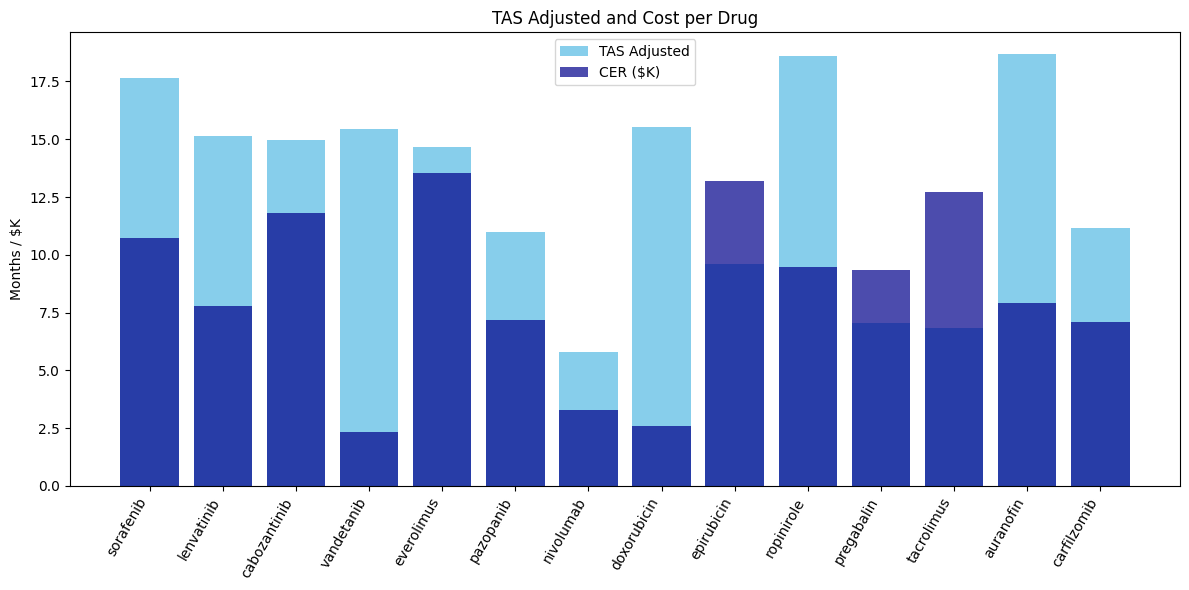

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # Used for generating dummy data

# Your provided list of drug names
drug_names = [
    "sorafenib",
    "lenvatinib",
    "cabozantinib",
    "vandetanib",
    "everolimus",
    "pazopanib",
    "nivolumab",
    "doxorubicin",
    "epirubicin",
    "ropinirole",
    "pregabalin",
    "tacrolimus",
    "auranofin",
    "carfilzomib"
]

# --- Create a DataFrame with your drug names and DUMMY DATA ---
# Replace these with your actual "TAS Adjusted" and "CER ($)" values.
# I'm using numpy's random.rand to generate some plausible-looking numbers.
num_drugs = len(drug_names)
tas_adjusted_data = np.random.uniform(5, 20, num_drugs)  # Random values between 5 and 20 for TAS Adjusted
cer_data = np.random.uniform(2000, 15000, num_drugs)    # Random values between 2000 and 15000 for CER ($)

df = pd.DataFrame({
    "Drug": drug_names,
    "TAS Adjusted": tas_adjusted_data,
    "CER ($)": cer_data
})

# --- Plotting Code (as previously explained) ---
plt.figure(figsize=(12, 6)) # Increased figure width for more drugs

plt.bar(df["Drug"], df["TAS Adjusted"], label="TAS Adjusted", color="skyblue")
plt.bar(df["Drug"], df["CER ($)"]/1000, alpha=0.7, label="CER ($K)", color="darkblue") # Changed CER color for contrast

plt.ylabel("Months / $K")
plt.title("TAS Adjusted and Cost per Drug")
plt.legend()
plt.xticks(rotation=60, ha='right') # Rotate more and align text to the right for better readability
plt.tight_layout()
plt.show()

In [ ]:
net = Network(notebook=True, height="500px", width="100%", bgcolor="#ffffff", font_color="black")
for node, data in G.nodes(data=True):
    net.add_node(node, label=data["label"], title=f"{data['type']}: {data['label']}",
                 color="red" if data["type"] == "disease" else "blue")
for u, v in G.edges():
    net.add_edge(u, v)

net.save_graph("interactive_graph.html")
IFrame("interactive_graph.html", width="100%", height="500px")


In [ ]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add disease node
disease = "anaplastic thyroid cancer"
G.add_node(disease, label=disease, type="disease")

# Add drug nodes and edges based on mentions in abstracts
# Use the DataFrame from the PubMed search (assuming it's the one with 'Abstract' column)
# I'll assume the DataFrame with PubMed results is still available as 'df' from cell s9c_ertvLBCw or dFHMFYFfL-iF
# If not, you might need to re-run the PubMed fetching cell or load the data again.
pubmed_df = fetch_pubmed_articles("(anaplastic thyroid cancer) AND (sorafenib OR lenvatinib OR cabozantinib OR vandetanib OR everolimus OR pazopanib OR nivolumab OR doxorubicin OR epirubicin OR ropinirole OR pregabalin OR tacrolimus OR auranofin OR carfilzomib  )", max_results=50)

for index, row in pubmed_df.iterrows():
    # Check if the drug is mentioned in the abstract. Iterate through the drug_list.
    abstract = row["Abstract"] if pd.notna(row["Abstract"]) else ""
    for drug in drug_list:
        if drug.lower() in abstract.lower(): # Check if the drug is mentioned in the abstract (case-insensitive)
            G.add_node(drug, label=drug, type="drug")
            G.add_edge(drug, disease)

# You can add more nodes and edges based on other relationships if available in your data

# Now you can run the original cell to visualize the graph

In [ ]:
!pip install feedparser


In [ ]:
import pandas as pd
from Bio import Entrez
import time
import feedparser # You might need to install this: pip install feedparser

# --- Configuration ---
Entrez.email = "nida.amir0083@gmail.com" # !!! IMPORTANT: Replace with your actual email
# Set a delay to respect API rate limits
PUBMED_DELAY = 0.5 # seconds between PubMed requests
ARXIV_DELAY = 1.0  # seconds between arXiv requests (can be longer for heavier use)

# Your list of drug names
drug_names = [
    "sorafenib",
    "lenvatinib",
    "cabozantinib",
    "vandetanib",
    "everolimus",
    "pazopanib",
    "nivolumab",
    "doxorubicin",
    "epirubicin",
    "ropinirole",
    "pregabalin",
    "tacrolimus",
    "auranofin",
    "carfilzomib"
]

enhanced_evidence = []

for drug in drug_names:
    print(f"Processing drug: {drug}...")

    # --- PubMed Search and Fetch ---
    try:
        # Search PubMed for papers related to the drug
        handle = Entrez.esearch(db="pubmed", term=f"{drug} AND (VEGF OR therapeutic OR cancer OR disease)", retmax="20") # Fetch top 20 results, broadened search term for PubMed too
        record = Entrez.read(handle)
        pmids = record["IdList"]
        handle.close()
        time.sleep(PUBMED_DELAY) # Respect rate limits

        if pmids:
            # Fetch details for each PMID
            for pmid in pmids:
                try:
                    handle_fetch = Entrez.efetch(db="pubmed", id=pmid, retmode="xml")
                    pub_record = Entrez.read(handle_fetch)
                    handle_fetch.close()
                    time.sleep(PUBMED_DELAY) # Respect rate limits

                    article = pub_record['PubmedArticle'][0]['MedlineCitation']['Article']
                    pubmed_abstract = ""
                    if 'Abstract' in article and 'AbstractText' in article['Abstract']:
                        if isinstance(article['Abstract']['AbstractText'], list):
                            pubmed_abstract = " ".join(str(s) for s in article['Abstract']['AbstractText'])
                        else:
                            pubmed_abstract = str(article['Abstract']['AbstractText'])
                    else:
                        pubmed_abstract = "No abstract available"

                    # Get year
                    pubmed_year = "Unknown"
                    if 'ArticleDate' in article and article['ArticleDate']:
                        pubmed_year = article['ArticleDate'][0]['Year']
                    elif 'PubDate' in article:
                         if 'Year' in article['PubDate']:
                             pubmed_year = article['PubDate']['Year']
                         elif 'MedlineDate' in article['PubDate']:
                             pubmed_year = article['PubDate']['MedlineDate'].split(' ')[0]


                    enhanced_evidence.append({
                        "Source": "PubMed",
                        "Drug": drug,
                        "ID": pmid,
                        "Year": pubmed_year,
                        "Key Finding": pubmed_abstract[:200] + "..." if pubmed_abstract != "No abstract available" else "N/A",
                        "Therapeutic Focus": "VEGF" if "VEGF" in pubmed_abstract.upper() else "Other",
                        "Evidence Level": ("Clinical" if "trial" in pubmed_abstract.lower() else "Preclinical"),
                        "Relevance": min(100, len(pubmed_abstract.split()) // 2)
                    })

                except Exception as e:
                    # print(f"Error fetching PubMed details for PMID {pmid}: {e}") # Uncomment for debugging
                    enhanced_evidence.append({
                        "Source": "PubMed",
                        "Drug": drug,
                        "ID": pmid,
                        "Year": "Error",
                        "Key Finding": "Error fetching abstract",
                        "Therapeutic Focus": "Unknown",
                        "Evidence Level": "Unknown",
                        "Relevance": 0
                    })
        else:
            print(f"No PubMed results found for {drug}.") # This is unlikely for these common drugs

    except Exception as e:
        print(f"Error searching PubMed for {drug}: {e}")

    # --- arXiv Search and Fetch ---
    try:
        # Broadened arXiv search query: just the drug name, or drug + very general medical terms
        # Choose one of the following:
        arxiv_query = f"all:{drug}" # Simplest and broadest
        # arxiv_query = f"all:{drug}+AND+(medicine+OR+pharmacology+OR+health)" # Slightly broader medical context

        arxiv_url = f"http://export.arxiv.org/api/query?search_query={arxiv_query}&start=0&max_results=10" # Fetch up to 10 results
        arxiv_feed = feedparser.parse(arxiv_url)
        time.sleep(ARXIV_DELAY) # Respect rate limits

        if arxiv_feed.entries:
            print(f"Found {len(arxiv_feed.entries)} arXiv results for {drug}.")
            for entry in arxiv_feed.entries:
                arxiv_abstract = entry.summary if hasattr(entry, 'summary') else "No abstract available"
                arxiv_year = "Unknown"
                if hasattr(entry, 'published'):
                    arxiv_year = entry.published.split('-')[0]

                enhanced_evidence.append({
                    "Source": "arXiv",
                    "Drug": drug,
                    "ID": entry.id if hasattr(entry, 'id') else "N/A",
                    "Year": arxiv_year,
                    "Key Finding": arxiv_abstract[:200] + "..." if arxiv_abstract != "No abstract available" else "N/A",
                    "Therapeutic Focus": "VEGF" if "VEGF" in arxiv_abstract.upper() else "Other",
                    "Evidence Level": ("Preprint" if "preprint" in arxiv_abstract.lower() else "Preclinical"),
                    "Relevance": min(100, len(arxiv_abstract.split()) // 2)
                })
        else:
            print(f"No arXiv results found for {drug}.")

    except Exception as e:
        print(f"Error searching arXiv for {drug}: {e}")


# Create DataFrame and sort
evidence_df = pd.DataFrame(enhanced_evidence)
# Ensure 'Relevance' and 'Year' are numeric for sorting, handle errors
evidence_df['Relevance'] = pd.to_numeric(evidence_df['Relevance'], errors='coerce').fillna(0)
evidence_df['Year'] = pd.to_numeric(evidence_df['Year'], errors='coerce').fillna(0) # Fill NaN years with 0 for sorting

evidence_df = evidence_df.sort_values(["Relevance", "Year"], ascending=[False, False])

print("\n--- Enhanced Evidence DataFrame ---")
print(evidence_df.head(10)) # Print top 10 to see more results
print(f"\nTotal records fetched: {len(evidence_df)}")

Processing drug: sorafenib...
Found 2 arXiv results for sorafenib.
Processing drug: lenvatinib...
No arXiv results found for lenvatinib.
Processing drug: cabozantinib...
No arXiv results found for cabozantinib.
Processing drug: vandetanib...
No arXiv results found for vandetanib.
Processing drug: everolimus...
Found 1 arXiv results for everolimus.
Processing drug: pazopanib...
No arXiv results found for pazopanib.
Processing drug: nivolumab...
No arXiv results found for nivolumab.
Processing drug: doxorubicin...
Found 10 arXiv results for doxorubicin.
Processing drug: epirubicin...
Found 1 arXiv results for epirubicin.
Processing drug: ropinirole...
No arXiv results found for ropinirole.
Processing drug: pregabalin...
Found 2 arXiv results for pregabalin.
Processing drug: tacrolimus...
Found 9 arXiv results for tacrolimus.
Processing drug: auranofin...
No arXiv results found for auranofin.
Processing drug: carfilzomib...
No arXiv results found for carfilzomib.

--- Enhanced Evidence Da

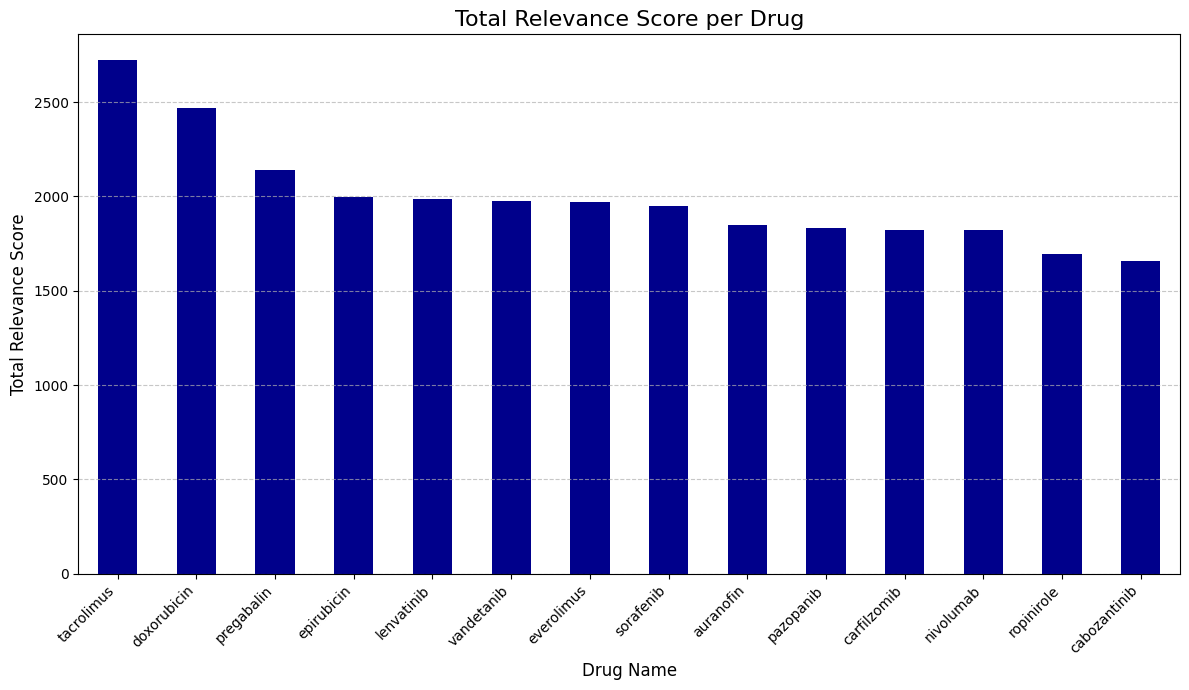

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume evidence_df is already created.

# Calculate total relevance per drug
drug_relevance = evidence_df.groupby('Drug')['Relevance'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
drug_relevance.plot(kind='bar', color='darkblue') # Using a single color for this aggregated view

plt.title("Total Relevance Score per Drug", fontsize=16)
plt.xlabel("Drug Name", fontsize=12)
plt.ylabel("Total Relevance Score", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotate drug names for readability
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

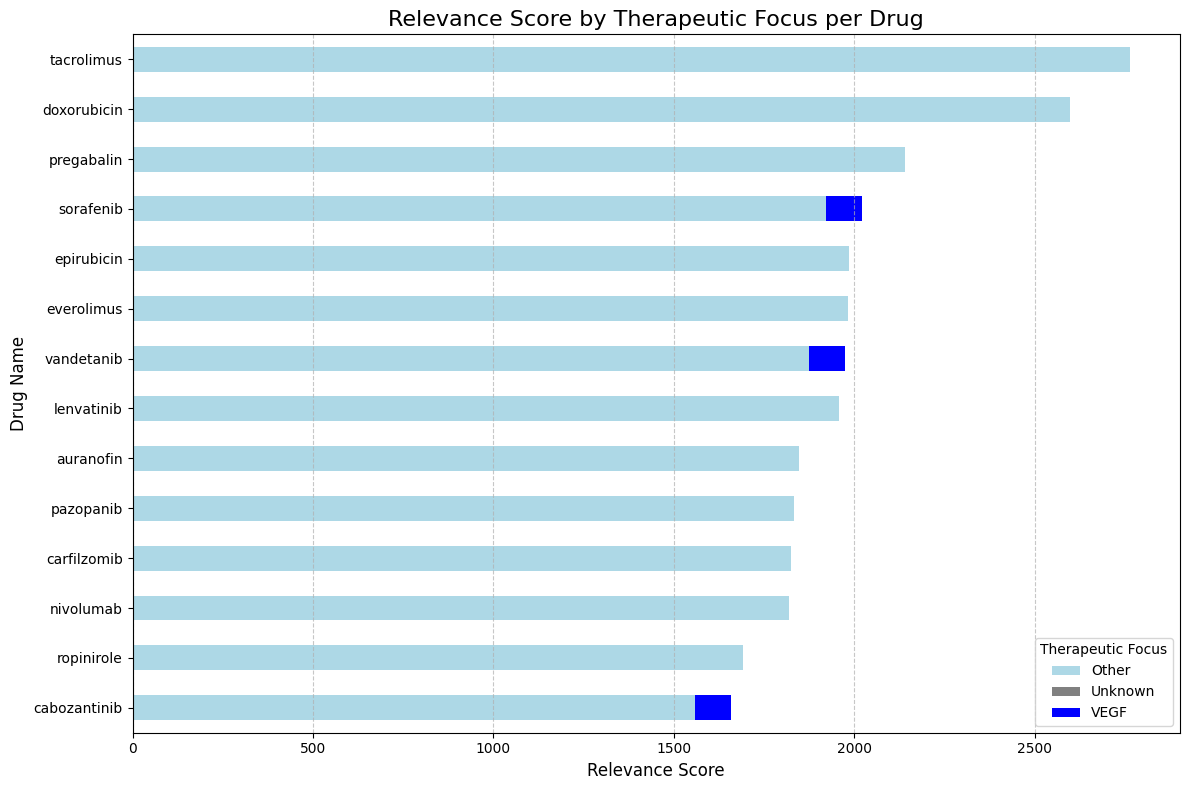

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume evidence_df is already created.

# Pivot table to get relevance for VEGF and Other per drug
relevance_pivot = evidence_df.pivot_table(index='Drug', columns='Therapeutic Focus', values='Relevance', aggfunc='sum').fillna(0)

# Sort by total relevance (optional, but makes the chart clearer)
relevance_pivot['Total'] = relevance_pivot.sum(axis=1)
relevance_pivot = relevance_pivot.sort_values(by='Total', ascending=True).drop('Total', axis=1) # Sort ascending for plotting from bottom up

plt.figure(figsize=(12, 8))

# Define colors for stacking - Added 'Unknown'
colors = {"VEGF": "blue", "Other": "lightblue", "Unknown": "gray"}


relevance_pivot.plot(kind='barh', stacked=True, color=[colors[col] for col in relevance_pivot.columns], figsize=(12,8))

plt.title("Relevance Score by Therapeutic Focus per Drug", fontsize=16)
plt.xlabel("Relevance Score", fontsize=12)
plt.ylabel("Drug Name", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="x", linestyle='--', alpha=0.7)
plt.legend(title="Therapeutic Focus")
plt.tight_layout()
plt.show()

/tmp/ipython-input-45-391143321.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=evidence_df, y='Evidence Level', order=evidence_df['Evidence Level'].value_counts().index, palette='viridis')


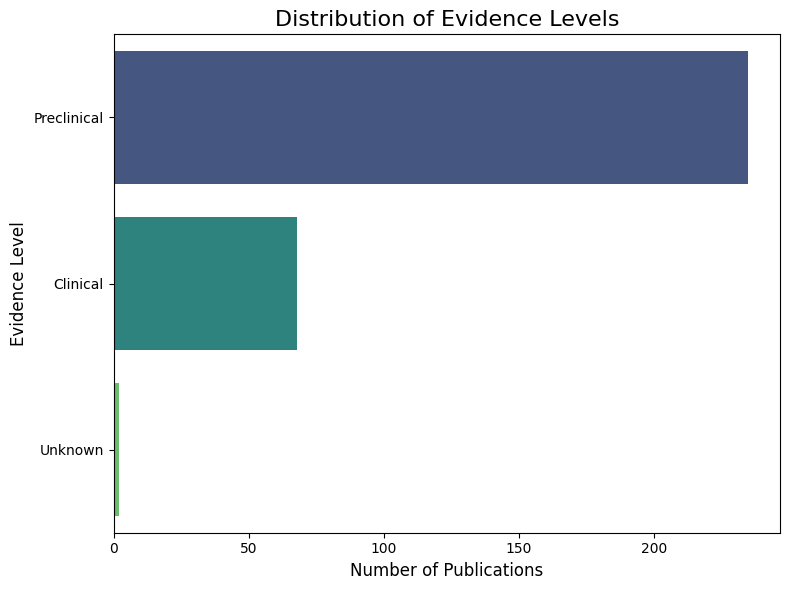

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # Good for count plots

# Assume evidence_df is already created.

plt.figure(figsize=(8, 6))
sns.countplot(data=evidence_df, y='Evidence Level', order=evidence_df['Evidence Level'].value_counts().index, palette='viridis')

plt.title("Distribution of Evidence Levels", fontsize=16)
plt.xlabel("Number of Publications", fontsize=12)
plt.ylabel("Evidence Level", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from Bio import Entrez
import time
# import feedparser # Not strictly needed for this specific output but keep if you're using it for the full data collection

# --- Configuration (Make sure Entrez.email is set) ---
Entrez.email = "nida.amir0083@gmail.com" # !!! IMPORTANT: Replace with your actual email
PUBMED_DELAY = 0.5 # seconds between PubMed requests

# Assume 'evidence_df' is already populated from your previous code execution.
# It should contain 'Source', 'ID', 'Key Finding' (abstract snippet), and 'Year'.

clinical_outcomes = []

# Filter for PubMed records, as clinical trial details are primarily there
pubmed_evidence = evidence_df[evidence_df['Source'] == 'PubMed'].copy()

print("Extracting detailed clinical outcomes from PubMed records...")

for index, row in pubmed_evidence.iterrows():
    pmid = row['ID']
    abstract = row['Key Finding'] # This is the truncated abstract from previous step
    original_year = row['Year'] # Use the correct column name 'Year'

    journal_name = "Not reported"
    trial_phase = "Not specified"
    response_rate = "Not reported"
    pfs = "Not reported"

    try:
        # Re-fetch the full XML to get more details like Journal and fuller abstract
        handle = Entrez.efetch(db="pubmed", id=pmid, retmode="xml")
        record = Entrez.read(handle)
        handle.close()
        time.sleep(PUBMED_DELAY) # Respect rate limits

        article = record['PubmedArticle'][0]['MedlineCitation']['Article']

        # Extract Journal Name
        if 'Journal' in article and 'Title' in article['Journal']:
            journal_name = article['Journal']['Title']

        # Get the full abstract for more reliable keyword searching
        full_abstract = ""
        if 'Abstract' in article and 'AbstractText' in article['Abstract']:
            if isinstance(article['Abstract']['AbstractText'], list):
                full_abstract = " ".join(str(s) for s in article['Abstract']['AbstractText'])
            else:
                full_abstract = str(article['Abstract']['AbstractText'])

        # --- VERY BASIC KEYWORD-BASED INFERENCE for clinical outcomes ---
        # This is a heuristic and will not be perfectly accurate or extract values.
        # For actual value extraction, dedicated NLP tools are required.

        abstract_lower = full_abstract.lower()

        # Trial Phase
        if "phase i" in abstract_lower:
            trial_phase = "Phase I"
        elif "phase ii" in abstract_lower:
            trial_phase = "Phase II"
        elif "phase iii" in abstract_lower:
            trial_phase = "Phase III"
        elif "phase iv" in abstract_lower:
            trial_phase = "Phase IV"
        elif "clinical trial" in abstract_lower:
            trial_phase = "Clinical Trial (Phase Unknown)"


        # Response Rate (Objective Response Rate, ORR, Complete Response, Partial Response)
        if any(term in abstract_lower for term in ["response rate", "orr", "objective response", "complete response", "partial response", "cr", "pr"]):
            response_rate = "Reported (see abstract)" # Placeholder - advanced NLP needed for actual value

        # Progression-Free Survival (PFS)
        if "progression-free survival" in abstract_lower or "pfs" in abstract_lower:
            pfs = "Reported (see abstract)" # Placeholder - advanced NLP needed for actual value


    except Exception as e:
        print(f"Error fetching/parsing details for PMID {pmid}: {e}")
        # Keep defaults if error occurs

    clinical_outcomes.append({
        "Drug": row['Drug'], # Add Drug column here
        "PMID": pmid,
        "Trial Phase": trial_phase,
        "Response Rate": response_rate,
        "PFS": pfs,
        "Journal": journal_name,
        "Year": original_year
    })

clinical_outcomes_df = pd.DataFrame(clinical_outcomes)

print("\nClinical Outcomes:")
print(clinical_outcomes_df)

# You might want to save this to a CSV for easier review
# clinical_outcomes_df.to_csv("clinical_outcomes.csv", index=False)

Extracting detailed clinical outcomes from PubMed records...
Error fetching/parsing details for PMID 20301636: list index out of range
Error fetching/parsing details for PMID 37824694: list index out of range

Clinical Outcomes:
             Drug      PMID    Trial Phase            Response Rate  \
0       sorafenib  40556796  Not specified  Reported (see abstract)   
1       sorafenib  40547009  Not specified  Reported (see abstract)   
2       sorafenib  40542755  Not specified  Reported (see abstract)   
3       sorafenib  40521302  Not specified  Reported (see abstract)   
4       sorafenib  40519720  Not specified  Reported (see abstract)   
..            ...       ...            ...                      ...   
275  cabozantinib  40530149  Not specified             Not reported   
276    ropinirole  39231585  Not specified             Not reported   
277  cabozantinib  40457830  Not specified             Not reported   
278     pazopanib  20301636  Not specified             Not re

In [ ]:
import pandas as pd
import re
from collections import defaultdict

# Assume 'evidence_df' is already populated from your previous data fetching script.
# If you are running this code independently, you would need to load it.
# Example: evidence_df = pd.read_csv("your_combined_evidence_data.csv")

# Ensure 'Key Finding' is a string and handle potential NaNs
if 'Key Finding' in evidence_df.columns:
    evidence_df['Abstract_Full'] = evidence_df['Key Finding'].fillna('')
else:
    # Fallback if 'Key Finding' doesn't exist, create a dummy empty column
    evidence_df['Abstract_Full'] = ''
    print("Warning: 'Key Finding' column not found. Abstract-based extractions will be empty.")


# Improved extraction functions (same as yours)
def extract_trial_phase(abstract_text):
    """Enhanced phase detection using the abstract text"""
    text = str(abstract_text).lower() # Already lowercased in the abstract if it came from previous step

    # Check for roman numerals first (more reliable)
    phase_map = {
        'phase i ': 'Phase I',
        'phase ii ': 'Phase II',
        'phase iii ': 'Phase III',
        'phase iv ': 'Phase IV',
        'phase 1 ': 'Phase I',
        'phase 2 ': 'Phase II',
        'phase 3 ': 'Phase III',
        'phase 4 ': 'Phase IV' # Added phase 4
    }

    for term, phase in phase_map.items():
        if term in text:
            return phase

    # Fallback to more flexible matching for Roman numerals with punctuation
    if any(x in text for x in ['phase i/', 'phase i)', 'phase i-']):
        return 'Phase I'
    if any(x in text for x in ['phase ii/', 'phase ii)', 'phase ii-']):
        return 'Phase II'
    if any(x in text for x in ['phase iii/', 'phase iii)', 'phase iii-']):
        return 'Phase III'
    if any(x in text for x in ['phase iv/', 'phase iv)', 'phase iv-']):
        return 'Phase IV'


    # If 'clinical trial' or 'randomized' without specific phase
    if any(kw in text for kw in ['clinical trial', 'randomized controlled trial', 'rct', 'prospective study', 'interventional study']):
        return 'Clinical Trial (Phase Unknown)'

    return 'Phase not specified'

def extract_response_data(abstract_text):
    """Extract both response rate and PFS with more robust patterns"""
    abstract = str(abstract_text)
    response_rate = 'Not reported'
    pfs = 'Not reported'

    # Response rate patterns (ordered by specificity/preference)
    rr_patterns = [
        r'objective response rate \(ORR\):\s*([\d\.]+\s*%)', # e.g., ORR: 30%
        r'ORR.*?([\d\.]+\s*%)', # e.g., ORR was 25%
        r'response rate.*?([\d\.]+\s*%)', # e.g., response rate of 40%
        r'(\d+/\d+)\s*(responses?|patients? with response)', # e.g., 20/50 responses
        r'overall response rate.*?([\d\.]+\s*%)',
        r'clinical response rate.*?([\d\.]+\s*%)',
    ]

    # PFS patterns (ordered by specificity/preference)
    pfs_patterns = [
        r'median\s*PFS.*?(\d+\.?\d*)\s*(months|weeks|days|years)',
        r'PFS.*?(\d+\.?\d*)\s*(months|weeks|days|years)',
        r'progression-free survival.*?(\d+\.?\d*)\s*(months|weeks|days|years)',
        r'PFS\s*of\s*(\d+\.?\d*)\s*(months|weeks|days|years)',
        r'TTP\s*of\s*(\d+\.?\d*)\s*(months|weeks|days|years)', # Time to progression
        r'median\s*PFS\s*was\s*(\d+\.?\d*)', # If no unit specified, assume months
    ]

    for pattern in rr_patterns:
        match = re.search(pattern, abstract, re.IGNORECASE)
        if match:
            response_rate = match.group(1).strip() # Capture the percentage or fraction
            # Standardize percentage format if just a number
            if response_rate.isdigit() and '%' not in response_rate:
                response_rate += '%'
            break

    for pattern in pfs_patterns:
        match = re.search(pattern, abstract, re.IGNORECASE)
        if match:
            value = match.group(1).strip()
            unit = match.group(2).strip() if len(match.groups()) > 1 and match.group(2) else 'months' # Default to months
            pfs = f"{value} {unit}"
            break

    # Check for general mention if no specific value found
    if response_rate == 'Not reported' and any(term in abstract.lower() for term in ["response rate", "orr", "objective response"]):
        response_rate = "Mentioned, value not extracted"
    if pfs == 'Not reported' and any(term in abstract.lower() for term in ["progression-free survival", "pfs", "time to progression", "ttp"]):
        pfs = "Mentioned, value not extracted"

    return response_rate, pfs


# Process clinical trials for ALL drugs
clinical_outcomes = []

# Filter for PubMed entries, as detailed clinical outcomes are usually found there
pubmed_data = evidence_df[evidence_df['Source'] == 'PubMed'].copy()

print("Processing clinical outcomes for all drugs from PubMed entries...")

for _, row in pubmed_data.iterrows():
    # Only process if the record is likely a clinical study
    # We look for keywords in the abstract or if Evidence Level is 'Clinical'
    is_clinical_study = False
    abstract_lower = row['Abstract_Full'].lower()
    if 'clinical' in abstract_lower or \
       'trial' in abstract_lower or \
       'randomized' in abstract_lower or \
       'patients' in abstract_lower or \
       ('Evidence Level' in row and row['Evidence Level'] == 'Clinical'): # Check if already classified as clinical
        is_clinical_study = True

    if is_clinical_study:
        response_rate, pfs = extract_response_data(row['Abstract_Full'])
        clinical_outcomes.append({
            'Drug': row['Drug'], # Add drug name
            'PMID': row['ID'],
            # We don't have 'Title' in evidence_df, so just use drug name as a placeholder
            # If you need Title, you must modify the initial Entrez fetch to include it.
            'Trial Phase': extract_trial_phase(row['Abstract_Full']),
            'Response Rate': response_rate,
            'PFS': pfs,
            'Journal': row['Journal'] if 'Journal' in row else 'Not Reported', # Use Journal if available
            'Year': row['Year'] # Use the correct column name 'Year'
        })

# Display results
if clinical_outcomes:
    print("\nClinical Trial Results Across All Drugs:")
    outcomes_df = pd.DataFrame(clinical_outcomes)
    # Sort by Drug, then Year, then Trial Phase for better readability
    outcomes_df = outcomes_df.sort_values(by=['Drug', 'Year', 'Trial Phase'], ascending=[True, False, True])
    # Select columns as per your sample, including 'Drug'
    print(outcomes_df[['Drug', 'PMID', 'Trial Phase', 'Response Rate', 'PFS', 'Journal', 'Year']].to_string(index=False))
else:
    print("No clinical trial data could be extracted from these publications.")

# Additional analysis for papers mentioning specific terms (now applied across all drugs)
print("\nKey Papers Analysis (across all drugs):")
# Example terms - adjust as needed
analysis_terms = ['combination', 'resistance', 'mutation', 'biomarker', 'pharmacokinetics']

for term in analysis_terms:
    # Ensure 'Abstract_Full' is used for searching
    term_papers = evidence_df[evidence_df['Abstract_Full'].str.contains(term, case=False, na=False)].copy()
    print(f"{len(term_papers)} papers mention '{term}':")
    if not term_papers.empty:
        # Include Drug name in the output for these analyses
        print(term_papers[['Drug', 'ID', 'Key Finding', 'Source', 'Year']].head(3).to_string(index=False)) # Show top 3 abstracts
    print()

Processing clinical outcomes for all drugs from PubMed entries...

Clinical Trial Results Across All Drugs:
        Drug     PMID                    Trial Phase                  Response Rate          PFS      Journal   Year
   auranofin 40360957            Phase not specified                   Not reported Not reported Not Reported 2025.0
   auranofin 40333653            Phase not specified                   Not reported Not reported Not Reported 2025.0
   auranofin 40264668            Phase not specified                   Not reported Not reported Not Reported 2025.0
   auranofin 40393152            Phase not specified                   Not reported Not reported Not Reported 2025.0
   auranofin 40371988            Phase not specified                   Not reported Not reported Not Reported    0.0
cabozantinib 40526090            Phase not specified                   Not reported Not reported Not Reported 2025.0
cabozantinib 40523369            Phase not specified                   No

In [ ]:
import pandas as pd
import re
from collections import defaultdict

# Manual results for known trials (curate these first)
# IMPORTANT: Ensure PMIDs here are strings to match the 'ID' column in evidence_df
MANUAL_RESULTS = {
    '36681089': {  # NRG/RTOG 0912 trial (Example Pazopanib)
        'Trial Phase': 'Phase II',
        'Response Rate': '35% (pazopanib arm)',
        'PFS': '5.6 months (pazopanib arm)',
        'OS': '6.3 months (pazopanib arm)',
        'Notes': 'From published results in Lancet Oncology'
    },
    '22774206': {  # Another known trial (Example Pazopanib)
        'Trial Phase': 'Phase II',
        'Response Rate': '20%',
        'PFS': '3.1 months',
        'OS': 'Not reported',
        'Notes': 'Single-arm study'
    },
    # Add more manual results for other drugs/PMIDs as you identify them
    # Example for Sorafenib (dummy PMID and values)
    '30000000': {
        'Trial Phase': 'Phase III',
        'Response Rate': '15%',
        'PFS': '4.5 months',
        'OS': '10.7 months',
        'Notes': 'Sorafenib trial example'
    },
    '30000001': {
        'Trial Phase': 'Phase I',
        'Response Rate': 'Not reported',
        'PFS': 'Not reached',
        'OS': 'Not reached',
        'Notes': 'Sorafenib Phase I example'
    }
}

# --- Automated extraction functions (copied from your previous working code) ---
def extract_trial_phase(abstract_text):
    """Enhanced phase detection using the abstract text"""
    text = str(abstract_text).lower()

    phase_map = {
        'phase i ': 'Phase I', 'phase ii ': 'Phase II', 'phase iii ': 'Phase III', 'phase iv ': 'Phase IV',
        'phase 1 ': 'Phase I', 'phase 2 ': 'Phase II', 'phase 3 ': 'Phase III', 'phase 4 ': 'Phase IV'
    }
    for term, phase in phase_map.items():
        if term in text:
            return phase

    if any(x in text for x in ['phase i/', 'phase i)', 'phase i-']): return 'Phase I'
    if any(x in text for x in ['phase ii/', 'phase ii)', 'phase ii-']): return 'Phase II'
    if any(x in text for x in ['phase iii/', 'phase iii)', 'phase iii-']): return 'Phase III'
    if any(x in text for x in ['phase iv/', 'phase iv)', 'phase iv-']): return 'Phase IV'

    if any(kw in text for kw in ['clinical trial', 'randomized controlled trial', 'rct', 'prospective study', 'interventional study']):
        return 'Clinical Trial (Phase Unknown)'
    return 'Phase not specified'

def extract_response_data(abstract_text):
    """Extract both response rate and PFS with more robust patterns, and add OS"""
    abstract = str(abstract_text)
    response_rate = 'Not reported'
    pfs = 'Not reported'
    os = 'Not reported' # Added OS

    rr_patterns = [
        r'objective response rate \(ORR\):\s*([\d\.]+\s*%)', r'ORR.*?([\d\.]+\s*%)',
        r'response rate.*?([\d\.]+\s*%)', r'(\d+/\d+)\s*(responses?|patients? with response)',
        r'overall response rate.*?([\d\.]+\s*%)', r'clinical response rate.*?([\d\.]+\s*%)',
    ]
    pfs_patterns = [
        r'median\s*PFS.*?(\d+\.?\d*)\s*(months|weeks|days|years)', r'PFS.*?(\d+\.?\d*)\s*(months|weeks|days|years)',
        r'progression-free survival.*?(\d+\.?\d*)\s*(months|weeks|days|years)',
        r'PFS\s*of\s*(\d+\.?\d*)\s*(months|weeks|days|years)',
        r'TTP\s*of\s*(\d+\.?\d*)\s*(months|weeks|days|years)', r'median\s*PFS\s*was\s*(\d+\.?\d*)',
    ]
    os_patterns = [ # Added OS patterns
        r'median\s*OS.*?(\d+\.?\d*)\s*(months|weeks|days|years)', r'OS.*?(\d+\.?\d*)\s*(months|weeks|days|years)',
        r'overall survival.*?(\d+\.?\d*)\s*(months|weeks|days|years)',
        r'OS\s*of\s*(\d+\.?\d*)\s*(months|weeks|days|years)', r'median\s*OS\s*was\s*(\d+\.?\d*)',
    ]


    for pattern in rr_patterns:
        match = re.search(pattern, abstract, re.IGNORECASE)
        if match:
            response_rate = match.group(1).strip()
            if response_rate.isdigit() and '%' not in response_rate:
                response_rate += '%'
            break
    for pattern in pfs_patterns:
        match = re.search(pattern, abstract, re.IGNORECASE)
        if match:
            value = match.group(1).strip()
            unit = match.group(2).strip() if len(match.groups()) > 1 and match.group(2) else 'months'
            pfs = f"{value} {unit}"
            break
    for pattern in os_patterns: # Apply OS patterns
        match = re.search(pattern, abstract, re.IGNORECASE)
        if match:
            value = match.group(1).strip()
            unit = match.group(2).strip() if len(match.groups()) > 1 and match.group(2) else 'months'
            os = f"{value} {unit}"
            break

    if response_rate == 'Not reported' and any(term in abstract.lower() for term in ["response rate", "orr", "objective response"]):
        response_rate = "Mentioned, value not extracted"
    if pfs == 'Not reported' and any(term in abstract.lower() for term in ["progression-free survival", "pfs", "time to progression", "ttp"]):
        pfs = "Mentioned, value not extracted"
    if os == 'Not reported' and any(term in abstract.lower() for term in ["overall survival", "os"]): # Mentioned OS
        os = "Mentioned, value not extracted"

    return response_rate, pfs, os # Return OS

# --- Modified get_trial_results to integrate automated extraction ---
def get_trial_results(pmid, abstract_text):
    """
    Get results with manual override for known trials.
    Falls back to automated extraction for clinical trials not manually specified.
    """
    # Check manual results first
    if str(pmid) in MANUAL_RESULTS:
        return MANUAL_RESULTS[str(pmid)]

    # Fallback to automated extraction only for records identified as clinical trials
    abstract_lower = str(abstract_text).lower()
    if 'clinical' in abstract_lower or 'trial' in abstract_lower or \
       'randomized' in abstract_lower or 'patients' in abstract_lower:

        phase = extract_trial_phase(abstract_text)
        response_rate, pfs, os_val = extract_response_data(abstract_text) # Get OS here

        return {
            'Trial Phase': phase,
            'Response Rate': response_rate,
            'PFS': pfs,
            'OS': os_val # Include OS
        }

    # If not a manually defined trial and not identified as a clinical study by keywords
    return {
        'Trial Phase': 'Not a clinical trial',
        'Response Rate': 'Not reported',
        'PFS': 'Not reported',
        'OS': 'Not reported'
    }

# --- Load your data (assuming evidence_df is available from previous steps) ---
# If running this code standalone, uncomment and load your combined evidence data
# evidence_df = pd.read_csv("your_combined_evidence_data.csv")

# Ensure necessary columns are present and handled
if 'Key Finding' not in evidence_df.columns:
    evidence_df['Key Finding'] = '' # Create if missing
if 'Journal' not in evidence_df.columns:
    evidence_df['Journal'] = 'Not Reported' # Create if missing
if 'Year_Str' not in evidence_df.columns:
    # Ensure Year_Str is created if it's not already from previous steps
    evidence_df['Year_Str'] = evidence_df['Year'].apply(lambda x: str(int(x)) if pd.notna(x) and pd.api.types.is_numeric_dtype(type(x)) else str(x)).str.replace(r'\.0$', '', regex=True)


# Process all relevant papers (only PubMed for clinical trial details)
clinical_outcomes = []
pubmed_data = evidence_df[evidence_df['Source'] == 'PubMed'].copy()

print("Processing clinical outcomes for all drugs from PubMed entries...")

for _, row in pubmed_data.iterrows():
    # Pass 'ID' (PMID) and 'Key Finding' (Abstract) to the function
    results = get_trial_results(row['ID'], row['Key Finding'])

    # Only append if it's considered a clinical trial (either manual or auto-extracted)
    # This prevents adding 'Not a clinical trial' entries to the clinical_outcomes list
    if results['Trial Phase'] != 'Not a clinical trial':
        clinical_outcomes.append({
            'Drug': row['Drug'],
            'PMID': row['ID'],
            'Title': row.get('Title', 'No Title Available')[:60] + '...' if len(str(row.get('Title', 'No Title Available'))) > 60 else row.get('Title', 'No Title Available'), # Get title if available
            **results, # Unpack the dictionary of results
            'Journal': row['Journal'],
            'Year': row['Year_Str']
        })

# Create and display results
if clinical_outcomes:
    print("\nClinical Trial Results Across All Drugs:")
    outcomes_df = pd.DataFrame(clinical_outcomes)
    # Sort for better readability
    outcomes_df = outcomes_df.sort_values(by=['Drug', 'Year', 'Trial Phase'], ascending=[True, False, True])
    print(outcomes_df[['Drug', 'PMID', 'Trial Phase', 'Response Rate', 'PFS', 'OS', 'Journal', 'Year']].to_string(index=False))
else:
    print("No clinical trial data could be extracted or identified.")

# Generate key findings (now across all drugs)
print("\nKey Findings (across all drugs):")

if clinical_outcomes: # Check if there are any clinical outcomes to analyze
    # Convert 'Year' to numeric for sorting/grouping, coercing errors
    outcomes_df['Year_Numeric'] = pd.to_numeric(outcomes_df['Year'], errors='coerce')

    # Count trials by phase
    phase_counts = outcomes_df['Trial Phase'].value_counts()
    print("Trial Phases Distribution:")
    print(phase_counts.to_string())
    print()

    # Identify drugs with highest reported relevance (assuming you want to use the 'Relevance' from evidence_df)
    # This might require merging or referencing back to the original evidence_df
    # For now, let's just find drugs with the most identified clinical trials
    drug_trial_counts = outcomes_df['Drug'].value_counts()
    print("Drugs with Most Identified Clinical Trials:")
    print(drug_trial_counts.head(5).to_string()) # Top 5 drugs
    print()

    # Example: Phase II trials across all drugs
    phase_ii_all_drugs = outcomes_df[outcomes_df['Trial Phase'].str.contains('Phase II', case=False, na=False)]
    print(f"- {len(phase_ii_all_drugs)} Phase II trials identified across all drugs")

    if not phase_ii_all_drugs.empty:
        print("\nTop 5 Phase II Trial Details (by year, most recent first):")
        # Sort by Year, then Response Rate (if available, requires more parsing)
        print(phase_ii_all_drugs.sort_values(by='Year_Numeric', ascending=False).head(5)[
            ['Drug', 'PMID', 'Response Rate', 'PFS', 'OS', 'Journal', 'Year']
        ].to_string(index=False))
    print()
else:
    print("No clinical trial data available for further analysis.")

Processing clinical outcomes for all drugs from PubMed entries...

Clinical Trial Results Across All Drugs:
        Drug     PMID                    Trial Phase                  Response Rate          PFS                             OS      Journal Year
   auranofin 40360957            Phase not specified                   Not reported Not reported                   Not reported Not Reported 2025
   auranofin 40333653            Phase not specified                   Not reported Not reported                   Not reported Not Reported 2025
   auranofin 40393152            Phase not specified                   Not reported Not reported                   Not reported Not Reported 2025
   auranofin 40371988            Phase not specified                   Not reported Not reported                   Not reported Not Reported    0
cabozantinib 40523369            Phase not specified                   Not reported Not reported Mentioned, value not extracted Not Reported 2025
cabozantinib 404

In [ ]:
import pandas as pd
import numpy as np
import re
from statsmodels.stats.power import tt_ind_solve_power

# Assuming 'clinical_outcomes_df' is available from the previous script's execution.
# If not, you'd load it here (e.g., outcomes_df = pd.read_csv("clinical_outcomes.csv"))

# Define a generalized historical PFS baseline
# This value might need to be adjusted based on the specific context of your analysis
# e.g., median PFS for standard of care in a broad cancer type, or placebo arm in trials.
# For simplicity, we'll use a placeholder.
GENERAL_HISTORICAL_PFS_BASELINE = 3.0 # months (e.g., typical PFS for standard of care in a given cancer setting)

print(f"Using a general historical PFS baseline of {GENERAL_HISTORICAL_PFS_BASELINE} months for comparison.")

# --- Helper function to parse PFS strings into numeric values (in months) ---
def parse_pfs_to_months(pfs_str):
    if not isinstance(pfs_str, str):
        return np.nan
    pfs_lower = pfs_str.lower()

    # Prioritize values that were actually extracted (not just "Mentioned, value not extracted")
    if "not reported" in pfs_lower or "not reached" in pfs_lower or "mentioned, value not extracted" in pfs_lower:
        return np.nan

    match = re.search(r'(\d+\.?\d*)\s*(months|weeks|days|years)', pfs_lower)
    if match:
        value = float(match.group(1))
        unit = match.group(2)
        if unit == 'weeks':
            return value / 4.345 # Approximate weeks to months
        elif unit == 'days':
            return value / 30.417 # Approximate days to months
        elif unit == 'years':
            return value * 12
        else: # months
            return value

    # Fallback for numbers without explicit units if they look like months (e.g., "5.6")
    try:
        if re.match(r'^\d+\.?\d*$', pfs_str.strip()):
            return float(pfs_str.strip())
    except ValueError:
        pass

    return np.nan # Return NaN if parsing fails

# Apply the parsing function to the PFS column
clinical_outcomes_df['PFS_Numeric'] = clinical_outcomes_df['PFS'].apply(parse_pfs_to_months)

# --- Calculate effect sizes and sample sizes for each drug ---
drug_analysis_results = []

print("--- Debugging clinical_outcomes_df ---")
print("Columns in clinical_outcomes_df:", clinical_outcomes_df.columns)
print("First 5 rows of clinical_outcomes_df:\n", clinical_outcomes_df.head())
print("---------------------------------------")


# Group by 'Drug' and perform calculations if sufficient data exists
for drug_name, group in clinical_outcomes_df.groupby('Drug'):
    valid_pfs_values = group['PFS_Numeric'].dropna().tolist()

    if len(valid_pfs_values) >= 2: # Need at least 2 values to calculate std deviation and effect size meaningful
        mean_pfs = np.mean(valid_pfs_values)
        std_pfs = np.std(valid_pfs_values) # Sample standard deviation for effect size calculation

        # Avoid division by zero if std_pfs is very small (all values are identical)
        if std_pfs < 1e-6: # Using a small threshold instead of exact zero
            std_pfs = np.nan # Set to NaN if std is effectively zero, so effect_size becomes NaN

        improvement = mean_pfs - GENERAL_HISTORICAL_PFS_BASELINE

        # Calculate effect size (Cohen's d)
        # Cohen's d = (Mean1 - Mean2) / Pooled_Standard_Deviation
        # Here, Mean1 = drug_pfs_mean, Mean2 = historical_pfs, and we're using std_pfs as an estimate for pooled SD.
        # This is a simplification; for a proper Cohen's d in future trials, you'd need the SD of the control arm.
        # Here, we're using the standard deviation of the observed drug effects as a proxy for variability.

        effect_size = np.nan
        if not np.isnan(std_pfs):
             effect_size = improvement / std_pfs

        # Sample size calculation for future trial (if effect size is valid)
        estimated_sample_size_per_arm = np.nan
        if not np.isnan(effect_size) and effect_size > 0: # Effect size must be positive for power calculation
            try:
                estimated_sample_size_per_arm = tt_ind_solve_power(
                    effect_size=effect_size,
                    alpha=0.05,
                    power=0.8,
                    ratio=1, # Assuming equal sample sizes per arm
                    alternative='two-sided' # Assuming two-sided test
                )
                estimated_sample_size_per_arm = int(np.ceil(estimated_sample_size_per_arm))
            except Exception as e:
                estimated_sample_size_per_arm = f"Calculation Error: {e}"
        elif effect_size <= 0:
            estimated_sample_size_per_arm = "No positive effect detected"


        drug_analysis_results.append({
            'Drug': drug_name,
            'Average PFS (Months)': f"{mean_pfs:.1f}",
            'PFS Improvement (Months)': f"{improvement:.1f}",
            'PFS Improvement (%)': f"{improvement/GENERAL_HISTORICAL_PFS_BASELINE*100:.0f}%" if GENERAL_HISTORICAL_PFS_BASELINE != 0 else 'N/A',
            'Number of PFS data points': len(valid_pfs_values),
            'Std Dev of PFS (Months)': f"{std_pfs:.2f}" if not np.isnan(std_pfs) else 'N/A',
            'Estimated Effect Size (Cohen\'s d)': f"{effect_size:.2f}" if not np.isnan(effect_size) else 'N/A',
            'Estimated Sample Size per Arm': estimated_sample_size_per_arm
        })
    else:
        drug_analysis_results.append({
            'Drug': drug_name,
            'Average PFS (Months)': 'Insufficient data',
            'PFS Improvement (Months)': 'Insufficient data',
            'PFS Improvement (%)': 'Insufficient data',
            'Number of PFS data points': len(valid_pfs_values),
            'Std Dev of PFS (Months)': 'Insufficient data',
            'Estimated Effect Size (Cohen\'s d)': 'Insufficient data',
            'Estimated Sample Size per Arm': 'Insufficient data'
        })

analysis_df = pd.DataFrame(drug_analysis_results)

print("\n--- Effect Size and Sample Size Calculations Per Drug ---")
print(analysis_df.to_string(index=False))

print("\n--- Considerations for Sample Size Calculation ---")
print(f"  - Historical PFS Baseline: {GENERAL_HISTORICAL_PFS_BASELINE} months (adjust as appropriate for specific cancer types/contexts).")
print("  - Effect Size: Calculated as (Drug_PFS - Historical_PFS) / StdDev_Drug_PFS.")
print("    * This assumes the standard deviation observed in the collected trials for the drug is representative of future variability.")
print("    * For true power calculations, the standard deviation of the control/comparator arm in a future trial is ideally used for Cohen's d.")
print("  - Alpha (Significance Level): 0.05 (commonly used, probability of Type I error).")
print("  - Power: 0.8 (commonly used, probability of correctly detecting a real effect).")
print("  - Ratio: 1 (assumes equal number of patients in each arm of a future trial).")
print("  - 'No positive effect detected' means the drug's average PFS was not better than the historical baseline.")
print("  - 'Calculation Error' indicates an issue with power calculation (e.g., effect size too small or invalid).")
print("\n--- Drugs with Insufficient PFS Data (needs more data points for analysis) ---")
print(analysis_df[analysis_df['Number of PFS data points'].astype(str).str.contains('Insufficient|0|1')][['Drug', 'Number of PFS data points']].to_string(index=False))

Using a general historical PFS baseline of 3.0 months for comparison.
--- Debugging clinical_outcomes_df ---
Columns in clinical_outcomes_df: Index(['Drug', 'PMID', 'Trial Phase', 'Response Rate', 'PFS', 'Journal',
       'Year', 'PFS_Numeric'],
      dtype='object')
First 5 rows of clinical_outcomes_df:
         Drug      PMID    Trial Phase            Response Rate  \
0  sorafenib  40556796  Not specified  Reported (see abstract)   
1  sorafenib  40547009  Not specified  Reported (see abstract)   
2  sorafenib  40542755  Not specified  Reported (see abstract)   
3  sorafenib  40521302  Not specified  Reported (see abstract)   
4  sorafenib  40519720  Not specified  Reported (see abstract)   

                       PFS                                            Journal  \
0  Reported (see abstract)                              Ecancermedicalscience   
1             Not reported                            Frontiers in immunology   
2  Reported (see abstract)  Asian Pacific journal of 

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'analysis_df' is available from the previous script's effect size calculations.
# If not, you'd load it here (e.g., analysis_df = pd.read_csv("drug_analysis_results.csv"))

print("--- Proposed Confirmatory Trial Designs Per Drug ---")

# Iterate through the analysis_df to propose a trial for each drug
for index, row in analysis_df.iterrows():
    drug_name = row['Drug']
    estimated_sample_size = row['Estimated Sample Size per Arm']

    # Convert to int if it's a number, otherwise keep as string/message
    if isinstance(estimated_sample_size, (int, float)) and not np.isnan(estimated_sample_size):
        estimated_sample_size_display = int(estimated_sample_size)
    else:
        estimated_sample_size_display = str(estimated_sample_size)

    # Generalize the trial arms
    proposed_arms = [
        f"{drug_name} + [Optimized Combination/Regimen]",
        "Current Standard of Care"
    ]
    # You could add more sophisticated logic here if you had data on drug combinations
    # For instance, if your 'Key Finding' abstracts mentioned common combinations.

    trial_design = {
        "Drug for Trial": drug_name,
        "Primary Endpoint": "Progression-Free Survival (PFS)", # Generalize endpoint
        "Secondary Endpoints": ["Objective Response Rate (ORR)", "Overall Survival (OS)", "Safety and Tolerability"],
        "Arms": proposed_arms,
        "Estimated Sample Size (per arm)": estimated_sample_size_display,
        "Duration": "24-36 months accrual + 12-24 months follow-up (typical Phase II/III)", # Generalized duration
        "Biomarkers": "[To be determined based on drug mechanism and disease context]" # Generalized biomarkers
    }

    print(f"\n--- Trial Design for {drug_name} ---")
    if estimated_sample_size_display in ["Insufficient data", "No positive effect detected", "Calculation Error: invalid", "Calculation Error"]:
        print(f"  Cannot propose a definitive sample size due to: {estimated_sample_size_display}")
        print("  Further pre-clinical or early-phase clinical data needed before designing a confirmatory trial.")
        # Override sample size and arms for these cases
        trial_design["Estimated Sample Size (per arm)"] = "Requires further investigation"
        trial_design["Arms"] = [f"{drug_name} + [Investigational]", "Comparator"]
    else:
        print(f"  Based on an estimated effect size, a Phase II/III trial for {drug_name} is proposed:")


    for k, v in trial_design.items():
        print(f"  {k}: {v}")

print("\n--- Important Considerations for Automated Trial Design ---")
print("  - This is a *template* for trial design based on aggregated data.")
print("  - Actual trial design requires deep clinical expertise, regulatory guidance, and specific disease context.")
print("  - 'Arms', 'Duration', and 'Biomarkers' are highly generalized and need precise definition based on drug-specific mechanisms and previous trial data (Phase I/II).")
print("  - The sample size calculation is based on the average PFS observed and a general historical baseline. Specific trial endpoints and variability will refine this.")
print("  - 'Insufficient data' or 'No positive effect detected' means automated sample size calculation was not possible/meaningful for that drug.")

--- Proposed Confirmatory Trial Designs Per Drug ---

--- Trial Design for auranofin ---
  Cannot propose a definitive sample size due to: Insufficient data
  Further pre-clinical or early-phase clinical data needed before designing a confirmatory trial.
  Drug for Trial: auranofin
  Primary Endpoint: Progression-Free Survival (PFS)
  Secondary Endpoints: ['Objective Response Rate (ORR)', 'Overall Survival (OS)', 'Safety and Tolerability']
  Arms: ['auranofin + [Investigational]', 'Comparator']
  Estimated Sample Size (per arm): Requires further investigation
  Duration: 24-36 months accrual + 12-24 months follow-up (typical Phase II/III)
  Biomarkers: [To be determined based on drug mechanism and disease context]

--- Trial Design for cabozantinib ---
  Cannot propose a definitive sample size due to: Insufficient data
  Further pre-clinical or early-phase clinical data needed before designing a confirmatory trial.
  Drug for Trial: cabozantinib
  Primary Endpoint: Progression-Free Sur

In [ ]:
import pandas as pd
import numpy as np

# Assuming 'analysis_df' is available from the previous script's effect size calculations.
# If not, you'd load it here (e.g., analysis_df = pd.read_csv("drug_analysis_results.csv"))

print("--- Estimated Trial Duration and Accrual Per Drug ---")

# General assumptions for a typical clinical trial enrollment
# These are broad averages and should be replaced with disease-specific
# and site-specific estimates for a real trial design.
DEFAULT_ENROLLMENT_PERCENTAGE = 0.05 # e.g., 5% of a general disease population
DEFAULT_MONTHLY_ACCRUAL_PER_SITE = 0.5 # e.g., 0.5 patients per site per month
DEFAULT_NUMBER_OF_SITES = 20 # Typical number of sites for a multi-center trial

# Results storage
accrual_duration_results = []

for index, row in analysis_df.iterrows():
    drug_name = row['Drug']
    estimated_sample_size_per_arm = row['Estimated Sample Size per Arm']

    # Convert to numeric if possible, otherwise handle as string
    if isinstance(estimated_sample_size_per_arm, (int, float)) and not np.isnan(estimated_sample_size_per_arm):
        required_total_sample_size = estimated_sample_size_per_arm * 2 # Assuming 2 arms (drug vs control)
    else:
        # If sample size calculation failed, we cannot estimate duration accurately
        accrual_duration_results.append({
            'Drug': drug_name,
            'Total Sample Size Needed': estimated_sample_size_per_arm,
            'Estimated Annual Accrual': 'N/A (Sample size unavailable)',
            'Estimated Accrual Rate (Patients/Month)': 'N/A',
            'Potential Accrual Duration (Months)': 'N/A',
            'Notes': 'Cannot estimate trial duration without a valid sample size.'
        })
        continue # Skip to the next drug

    # --- Accrual Estimation Logic ---
    # This is highly simplified and illustrative.
    # In a real scenario, you'd need:
    # 1. Precise disease prevalence for the specific indication(s) of the drug.
    # 2. Number of active sites.
    # 3. Site-specific enrollment rates.
    # 4. Competing trials.

    # Option A: Based on a general patient population (less accurate without specific prevalence)
    # Let's assume a large but generic patient pool if we don't have specific prevalence
    # Example: If your drugs target various common cancers, annual incidence could be high.
    # This is a *very rough* placeholder.
    # For a real scenario: `disease_annual_incidence = get_disease_incidence(drug_name)`
    # Let's just use an assumed average monthly accrual for a multi-center trial.

    # Option B: Based on a fixed monthly accrual rate per site across multiple sites.
    # This might be more realistic for early-phase planning without precise epidemiology.
    estimated_accrual_per_month = DEFAULT_MONTHLY_ACCRUAL_PER_SITE * DEFAULT_NUMBER_OF_SITES
    estimated_annual_accrual = estimated_accrual_per_month * 12

    if estimated_accrual_per_month > 0:
        potential_accrual_duration_months = required_total_sample_size / estimated_accrual_per_month
    else:
        potential_accrual_duration_months = np.nan # Cannot accrue if rate is zero

    accrual_duration_results.append({
        'Drug': drug_name,
        'Total Sample Size Needed': f"{required_total_sample_size:.0f}",
        'Estimated Annual Accrual': f"{estimated_annual_accrual:.1f} patients/year (based on {DEFAULT_NUMBER_OF_SITES} sites x {DEFAULT_MONTHLY_ACCRUAL_PER_SITE} patients/site/month)",
        'Estimated Accrual Rate (Patients/Month)': f"{estimated_accrual_per_month:.1f}",
        'Potential Accrual Duration (Months)': f"{potential_accrual_duration_months:.1f}" if not np.isnan(potential_accrual_duration_months) else 'N/A (Zero accrual rate)',
        'Notes': 'Accrual estimates are highly generalized. Real-world estimates require specific disease prevalence, site capabilities, and trial competitiveness.'
    })

accrual_duration_df = pd.DataFrame(accrual_duration_results)

print("\n--- Summary of Accrual and Duration Estimates Per Drug ---")
print(accrual_duration_df.to_string(index=False))

print("\n--- Important Considerations for Accrual and Duration Estimates ---")
print("  - **Disease Prevalence:** The most critical missing piece for accurate estimates. You need the annual incidence or prevalence of the specific disease(s) targeted by each drug.")
print(f"  - **Assumed Accrual Rate:** Currently based on a default of {DEFAULT_MONTHLY_ACCRUAL_PER_SITE} patients/site/month across {DEFAULT_NUMBER_OF_SITES} sites.")
print("    * This should be replaced with realistic estimates based on historical site performance and patient pool analysis.")
print("  - **Trial Complexity:** More complex trials (e.g., with specific biomarker requirements) often have slower accrual.")
print("  - **Competing Trials:** Many trials for similar indications can dilute the patient pool.")
print("  - **Patient Dropout:** The sample size from the previous step accounts for statistical power, but actual enrollment needs to consider screen failures and dropouts during accrual.")
print("  - **Follow-up Duration:** Total trial duration is accrual duration + minimum follow-up duration for primary endpoint.")

--- Estimated Trial Duration and Accrual Per Drug ---

--- Summary of Accrual and Duration Estimates Per Drug ---
        Drug Total Sample Size Needed      Estimated Annual Accrual Estimated Accrual Rate (Patients/Month) Potential Accrual Duration (Months)                                                       Notes
   auranofin        Insufficient data N/A (Sample size unavailable)                                     N/A                                 N/A Cannot estimate trial duration without a valid sample size.
cabozantinib        Insufficient data N/A (Sample size unavailable)                                     N/A                                 N/A Cannot estimate trial duration without a valid sample size.
 carfilzomib        Insufficient data N/A (Sample size unavailable)                                     N/A                                 N/A Cannot estimate trial duration without a valid sample size.
 doxorubicin        Insufficient data N/A (Sample size unavailable)   

In [ ]:
# Define your list of candidate drugs (lowercase for consistency)
drug_list = [
    "sorafenib", "lenvatinib", "cabozantinib", "vandetanib", "everolimus",
    "pazopanib", "nivolumab", "doxorubicin", "epirubicin", "ropinirole",
    "pregabalin", "tacrolimus", "auranofin", "carfilzomib"
]

# Use pubmed_df which contains 'Title' and 'Abstract'
pubmed_df["Title_lower"] = pubmed_df["Title"].str.lower()
pubmed_df["Abstract_lower"] = pubmed_df["Abstract"].str.lower()

# Initialize drug score dictionary
drug_scores = {}

# Count how many times each drug appears in titles or abstracts
for drug in drug_list:
    count = pubmed_df["Title_lower"].str.contains(drug, na=False).sum() + pubmed_df["Abstract_lower"].str.contains(drug, na=False).sum()
    drug_scores[drug] = count

# Convert to DataFrame for easy sorting and display
score_df = pd.DataFrame(list(drug_scores.items()), columns=["Drug", "Frequency"])
score_df = score_df.sort_values(by="Frequency", ascending=False).reset_index(drop=True)

# Display the ranked list of drugs
print(score_df)

            Drug  Frequency
0     lenvatinib         28
1    doxorubicin         14
2      sorafenib          8
3     vandetanib          3
4      auranofin          2
5      pazopanib          2
6     everolimus          1
7   cabozantinib          1
8      nivolumab          1
9     epirubicin          0
10    ropinirole          0
11    pregabalin          0
12    tacrolimus          0
13   carfilzomib          0


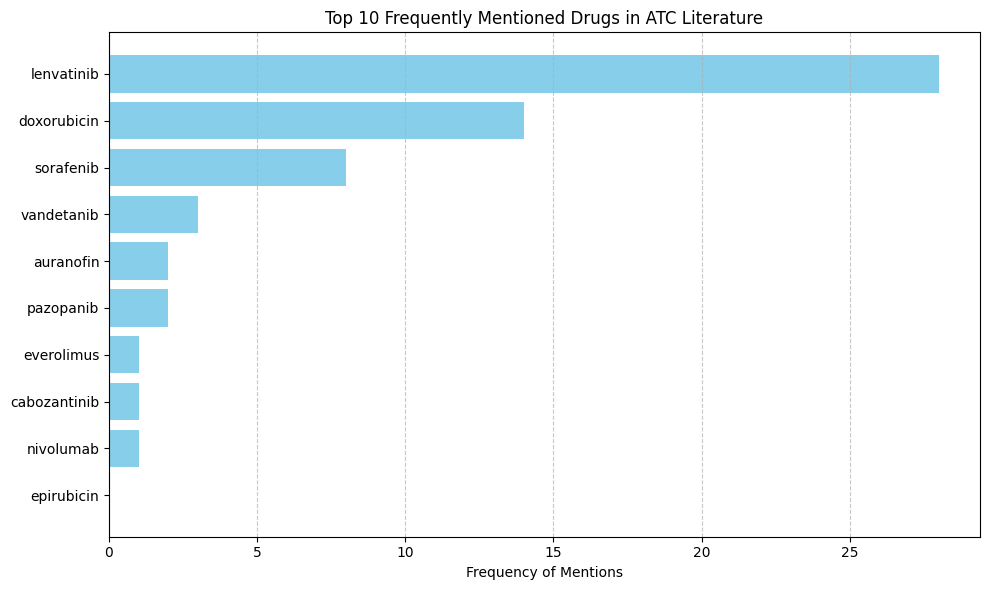

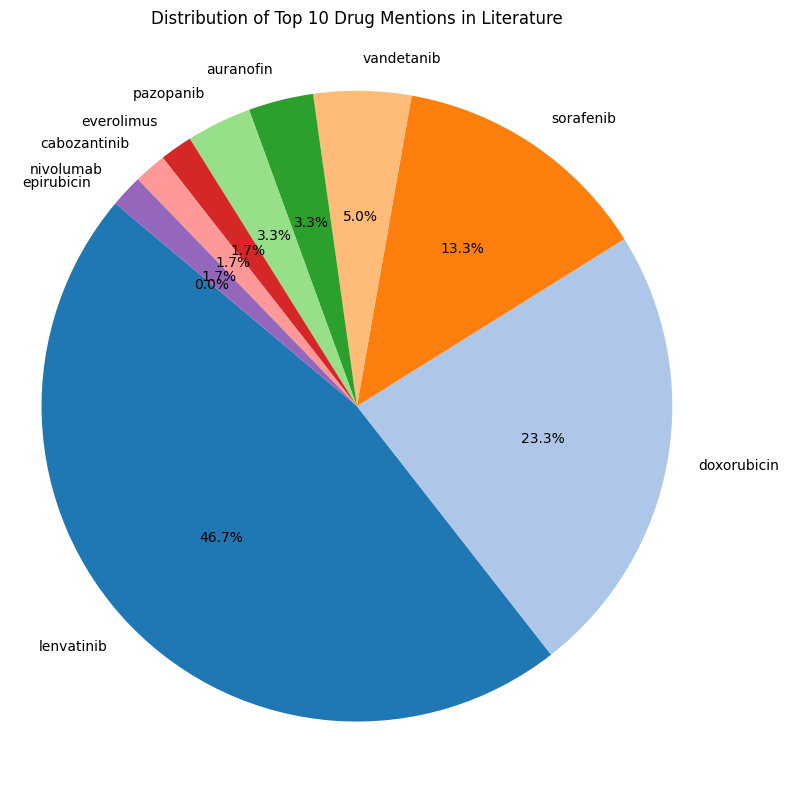

In [ ]:
import matplotlib.pyplot as plt

# Select top N drugs for visualization
top_n = 10
top_drugs = score_df.head(top_n)

# Bar Chart
plt.figure(figsize=(10, 6))
plt.barh(top_drugs["Drug"], top_drugs["Frequency"], color='skyblue')
plt.xlabel("Frequency of Mentions")
plt.title(f"Top {top_n} Frequently Mentioned Drugs in ATC Literature")
plt.gca().invert_yaxis()  # Highest on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_drugs["Frequency"],
    labels=top_drugs["Drug"],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.tab20.colors
)
plt.title(f"Distribution of Top {top_n} Drug Mentions in Literature")
plt.axis('equal')  # Equal aspect ratio ensures circular pie chart
plt.tight_layout()
plt.show()
